In [38]:
import numpy as np
import pandas as pd

# from autograd import numpy as ag  # import numpy from autograd for automatic differentiation
from autograd import grad        # for computing gradients
from autograd import numpy as ag  # import numpy from autograd for automatic differentiation
from autograd import elementwise_grad
import scipy.special as sp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
%config InlineBackend.figure_format = 'retina'
sns.set_theme(style="darkgrid", palette = "bright", font = "Helvetica")

import warnings
warnings.filterwarnings("ignore")




sku ---- supplier
many supppliers can sell the same sku
double-check on data

supplier ----- or
one order is one supplier


or ---- shp
many-to-many
double check tthat it is many to many



!!!it can be more later
later




In [5]:
region_colors = {
    'inactive learning region': 'blue',
    'slow learning region': 'green',
    'active learning region': 'orange',
    'fast learning region': 'red'
}

def plot_f(df):

    # Create a figure with two subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(11, 3))

    # Plot the sigmoid function in the first subplot
    sns.lineplot(data = df, x="x", y="y", ax=axes[0], label='region')
    axes[0].set_title('Function')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')

    # Plot the gradient of the sigmoid function in the second subplot
    sns.lineplot(data = df, x="x", y="y_g", ax=axes[1], label='region')
    axes[1].set_title('Function Gradient')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel("y")

    # Adjust layout for better spacing between the plots
    plt.tight_layout()
    plt.show()


# plot_f(x_values, sigmoid_values, gradient_values)

In [6]:
# 1. ReLU
def relu(z):
    return ag.maximum(0, z)

# 2. Logistic Sigmoid Activation Function
def sigmoid(z):
    return 1 / (1 + ag.exp(-z))

# 3. Piecewise Linear Unit
def piecewise_linear(z):
    return ag.where(z < -1, 0.2*z - 0.8, ag.where(z < 1, z, 0.2*z + 0.8))
    # return ag.where(ag.logical_and(z >= -1, z <= 1), z, 0.2*z - 0.8)

# 4. Swish
def swish(z, a=1):
    return z * sigmoid(a * z)

# 5. Exponential Linear Unit (ELU)
def elu(z, a=1):
    return ag.where(z >= 0, z, a * (ag.exp(z) - 1))

# 6. Gaussian Error Linear Unit (GELU)
def gelu(x):
    return 0.5 * x * (1 + ag.tanh(ag.sqrt(2 / ag.pi) * (x + 0.044715 * x**3)))





def get_activation_output_and_gradients(x_values, activation_function):
    # Check the activation function name and call the corresponding function
    if activation_function == 'ReLU':
        y = relu(x_values)
        relu_grad = elementwise_grad(relu)
        y_grad = relu_grad(x_values)
    elif activation_function == 'Logistic_Sigmoid':
        y = sigmoid(x_values)
        logistic_sigmoid_grad = elementwise_grad(sigmoid)
        y_grad = logistic_sigmoid_grad(x_values)
    elif activation_function == 'Piecewise_Linear':
        y = piecewise_linear(x_values)
        piecewise_linear_grad = elementwise_grad(piecewise_linear)
        y_grad = piecewise_linear_grad(x_values)
    elif activation_function == 'Swish':
        y = swish(x_values)
        swish_grad = elementwise_grad(swish)
        y_grad = swish_grad(x_values)
    elif activation_function == 'ELU':
        y = elu(x_values)
        elu_grad = elementwise_grad(elu)
        y_grad = elu_grad(x_values)
    elif activation_function == 'GELU':
        y = gelu(x_values)
        gelu_grad = elementwise_grad(gelu)
        y_grad = gelu_grad(x_values)
    else:
        raise ValueError("Unknown activation function: " + activation_function)
    
    return x_values, y, y_grad


In [59]:
x_values = np.linspace(-5, 5, 100)
x, y, y_g = get_activation_output_and_gradients(x_values, "Piecewise_Linear")

In [60]:
df = pd.DataFrame({"x":x, "y":y, "y_g":y_g})
df["grad_magnitude"] = df.y_g.apply(lambda x: max(x, -1*x))

# Define custom bins and labels
bins = [-float('inf'), 0, 0.01, 0.99, float('inf')]  # Edges of buckets
labels = ['inactive learning region', 'slow learning region', 'active learning region', 'fast learning region']

# Assign each value to a bucket
df['region'] = pd.cut(df['grad_magnitude'], bins=bins, labels=labels, right=False)

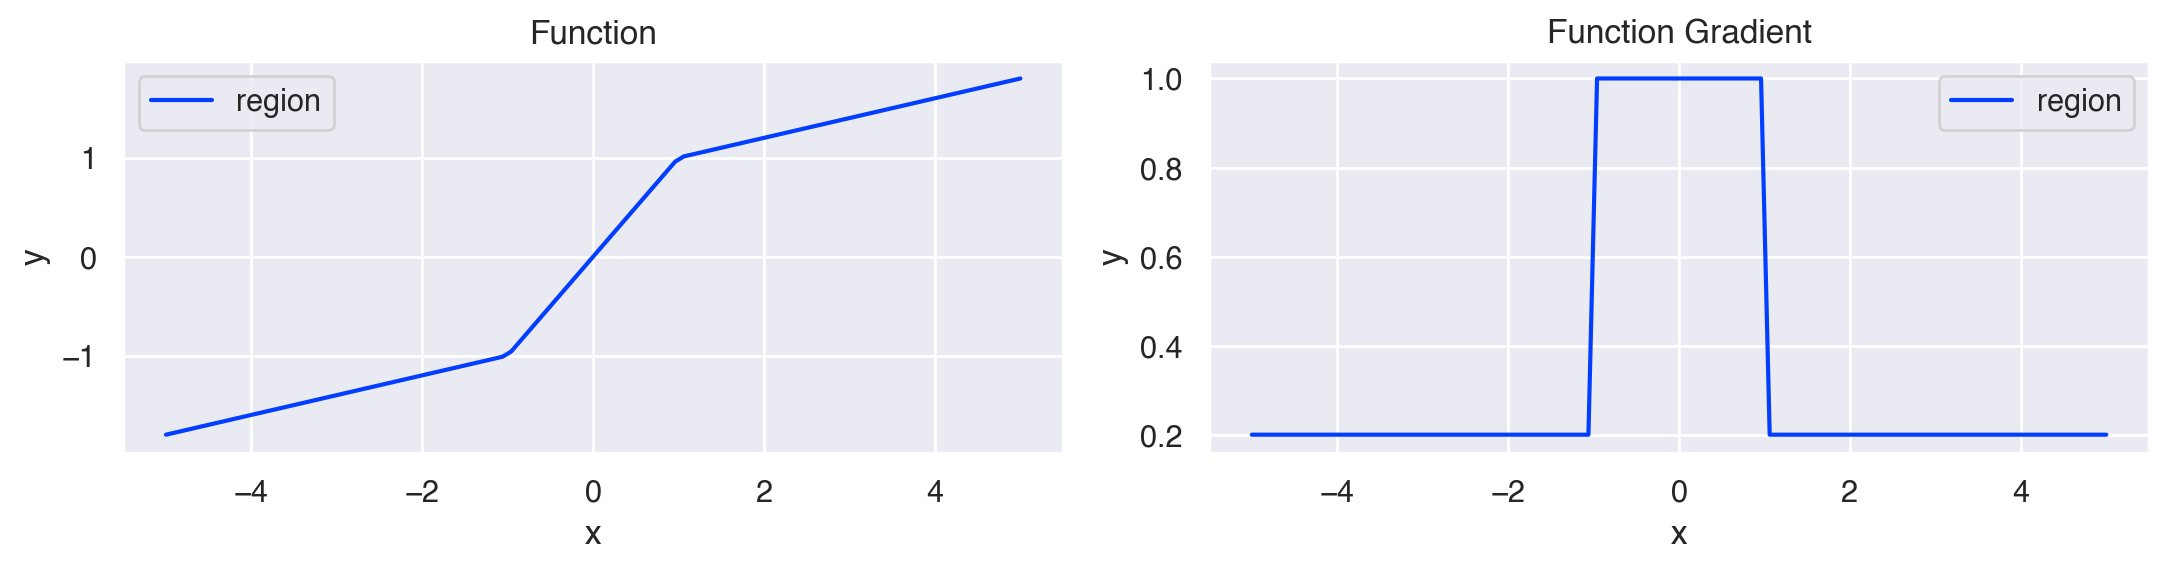

In [61]:
plot_f(df)

In [62]:
# Create a dictionary to store the ranges for each region
region_ranges = {}

for region in df["region"].unique():
    region_df = df[df["region"] == region]

    # Identify distinct contiguous subregions
    subregions = []
    sorted_x = sorted(region_df["x"].unique())

    start = sorted_x[0]
    prev = start

    for x in sorted_x[1:]:
        if x - prev > (sorted_x[1] - sorted_x[0]) * 1.5:  # Detecting gaps
            subregions.append((start, prev))
            start = x
        prev = x

    subregions.append((start, prev))  # Add the last segment
    y_range = (region_df["y_g"].min(), region_df["y_g"].max())

    region_ranges[region] = {"x_ranges": subregions, "y_g_range": y_range}

# Convert to DataFrame for better visualization
region_ranges_df = pd.DataFrame.from_dict(region_ranges, orient="index")

# Display the results
region_ranges_df

,x_ranges,y_g_range
active learning region,"[(-5.0, -1.0606060606060606), (1.0606060606060...","(0.2, 0.2)"
fast learning region,"[(-0.9595959595959593, 0.9595959595959593)]","(1.0, 1.0)"


In [28]:
region_ranges_df.iloc[0,0]

[(np.float64(-5.0), np.float64(-1.0606060606060606)),
 (np.float64(1.0606060606060606), np.float64(5.0))]

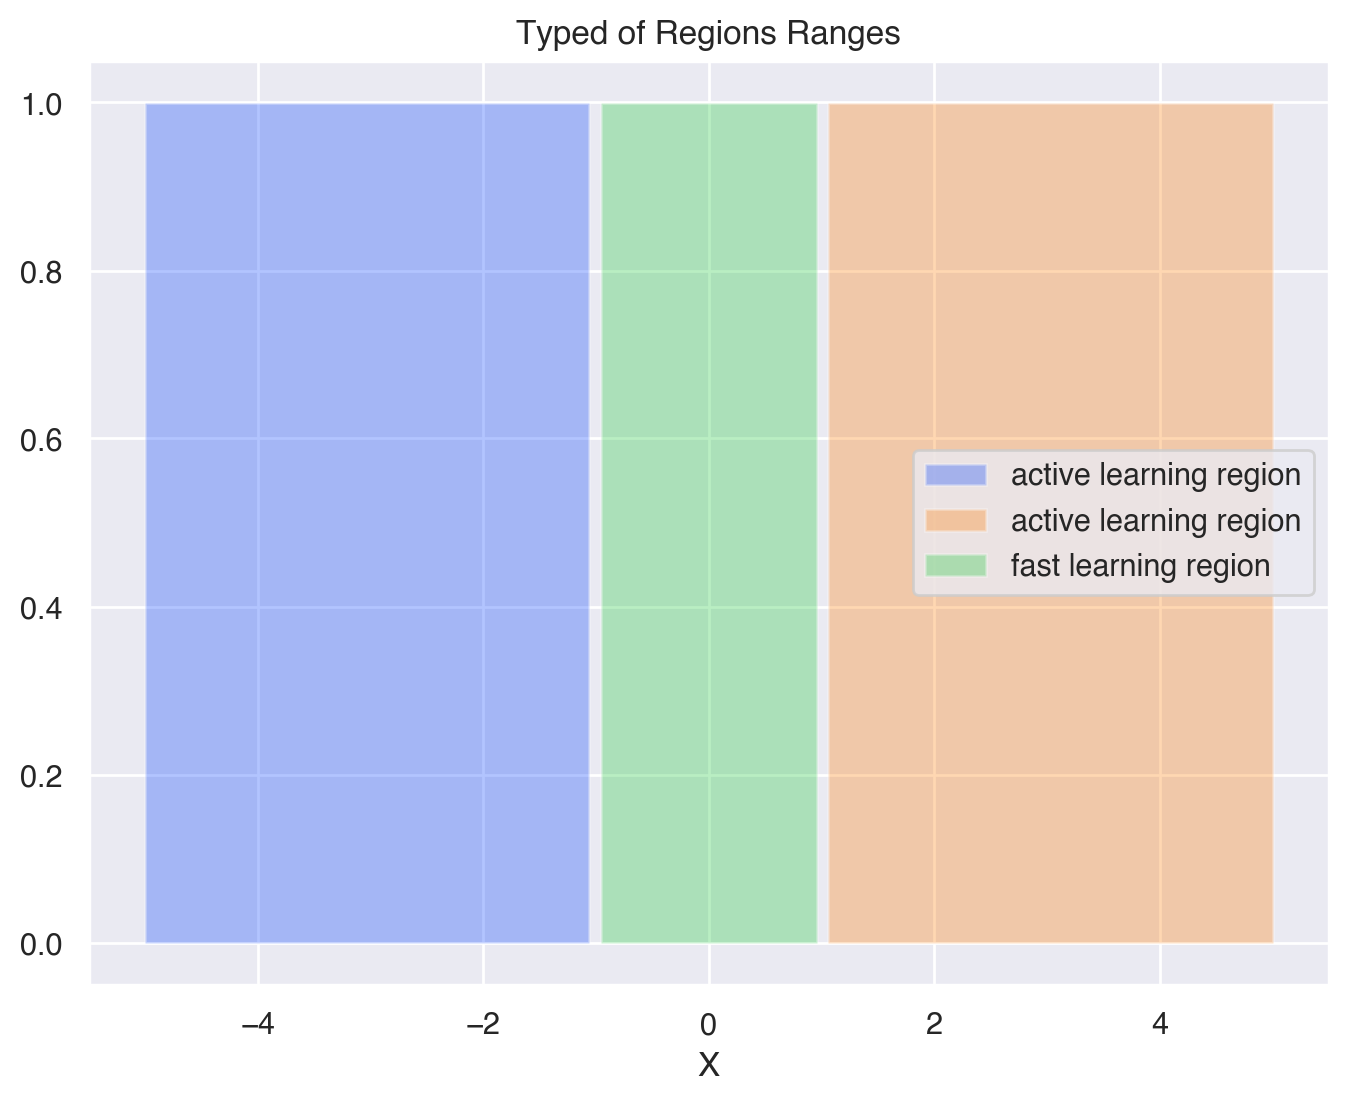

In [74]:
# Create a dictionary to store the ranges for each region
region_ranges = {}

for region in df["region"].unique():
    region_df = df[df["region"] == region]

    # Identify distinct contiguous subregions
    subregions = []
    sorted_x = sorted(region_df["x"].unique())

    start = sorted_x[0]
    prev = start

    for x in sorted_x[1:]:
        if x - prev > (sorted_x[1] - sorted_x[0]) * 1.5:  # Detecting gaps
            subregions.append((start, prev))
            start = x
        prev = x

    subregions.append((start, prev))  # Add the last segment
    y_range = (region_df["y"].min(), region_df["y"].max())

    region_ranges[region] = {"x_ranges": subregions, "y_range": y_range}

# Convert to DataFrame for better visualization
region_ranges_df = pd.DataFrame.from_dict(region_ranges, orient="index")

# Plot the data for visualization
plt.figure(figsize=(8, 6))

for region, values in region_ranges.items():
    y_min, y_max = values["y_range"]
    for x_min, x_max in values["x_ranges"]:
        plt.fill_between([x_min, x_max], 0, 1, alpha=0.3, label=region)

plt.xlabel("X")
plt.ylabel("")
plt.title("Typed of Regions Ranges")
plt.legend()
plt.grid(True)
plt.show()

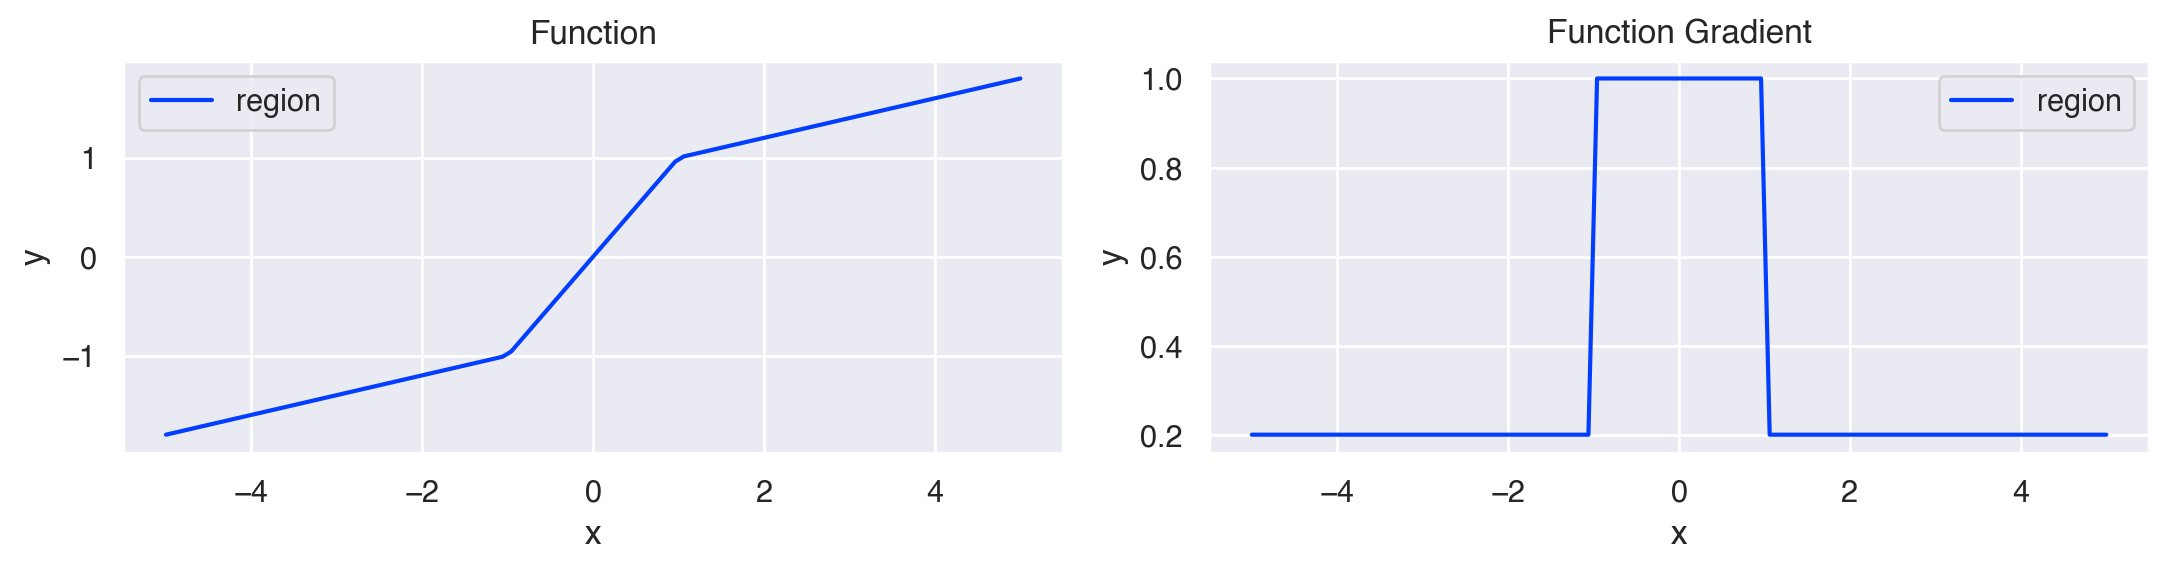

In [75]:
# Generate x values from -5 to 5
x_values = np.linspace(-5, 5, 100)

x, y, y_g = get_activation_output_and_gradients(x_values, "Piecewise_Linear")


df = pd.DataFrame({"x":x, "y":y, "y_g":y_g})
df["grad_magnitude"] = df.y_g.apply(lambda x: max(x, -1*x))
# Define custom bins and labels
bins = [-float('inf'), 0, 0.01, 0.99, float('inf')]  # Edges of buckets
labels = ['inactive learning region', 'slow learning region', 'active learning region', 'fast learning region']

# Assign each value to a bucket
df['region'] = pd.cut(df['grad_magnitude'], bins=bins, labels=labels, right=False)

# Group by 'region' and calculate the min and max for 'x' and 'y'
region_ranges = df.groupby('region').agg({
    'x': ['min', 'max'],  # Get min and max of 'x'
    'y': ['min', 'max'],  # Get min and max of 'y'
}).reset_index()

# Rename columns for clarity
region_ranges.columns = ['region', 'x_min', 'x_max', 'y_min', 'y_max']



plot_f(df)